# Customer Segmentation using Kmeans Clustering (Unsupervised Learning Algorithm)

Task 2 : Implement a Kmeans clustering algorithm to group customers of a retail store based on their purchase history

[*Mall Customer Segmentation Data(Click here)*](https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/data)

In this notebook, I will implement KMeans Clustering algorithm to segment customer data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


#### Dataset

In [2]:
# import dataset
df = pd.read_csv('Mall_Customers.csv')
df.head(10)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
#total rows and colums in the dataset
print(df.shape)
print(df.info())

(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


#### Feature Selection

In [4]:
# we consider only relevant features and discard all fields wiht non-numerical value for our clustering algo
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### FINDING K USING ELBOW METHOD

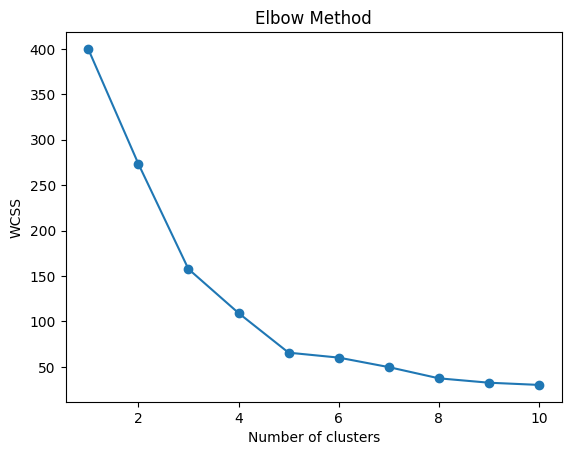

In [6]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### TRAINING KMEANS MODEL

In [7]:
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X_scaled)

#### PLOTTING CLUSTERS

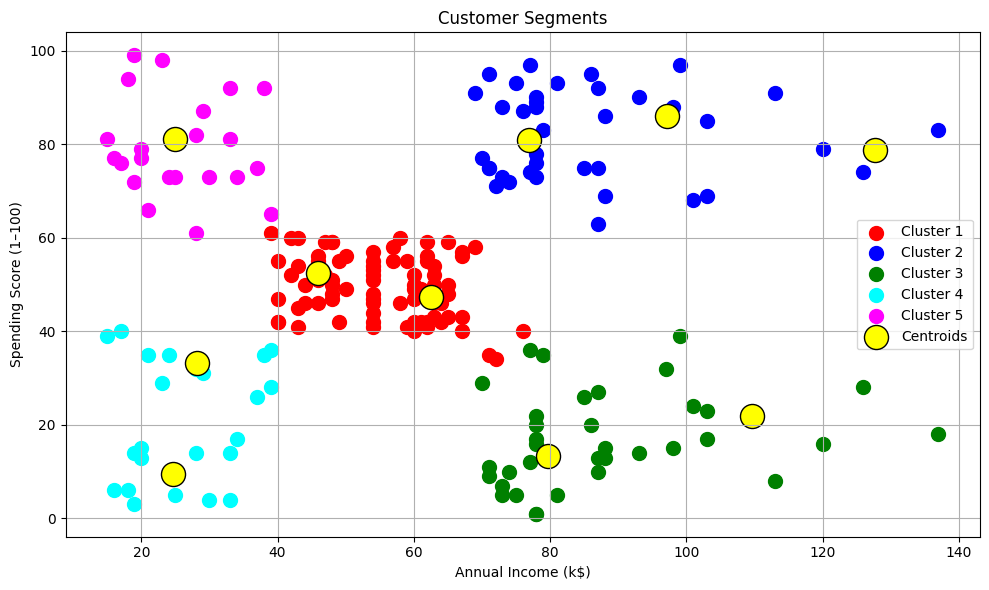

In [8]:
X_vis = scaler.inverse_transform(X_scaled)


# Corrected for 2-feature case (Annual Income and Spending Score)
plt.figure(figsize=(10, 6))

for i, color, label in zip(range(5), 
                           ['red', 'blue', 'green', 'cyan', 'magenta'], 
                           ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']):
    plt.scatter(
        X_vis[y_kmeans == i, 0],  # Annual Income
        X_vis[y_kmeans == i, 1],  # Spending Score
        s=100,
        c=color,
        label=label
    )

# Centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', edgecolors='black')

plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1–100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





### Model Interpretation
>Cluster 1 (RED) -> Average in terms of earning and spending  

>Cluster 2 (BLUE) -> Earning high and also Spending high [TARGET CUSTOMER] 

>Cluster 3 (GREEN) -> Earning high but Spending less

>Cluster 4 (CYAN) -> Earning less and Spending less 

>Cluster 5 (PINK) -> Earning less but Spending more

In [9]:
# Add cluster labels to the original data
df['Cluster'] = kmeansmodel.labels_

In [11]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


#### PREDICTING NEW CUSTOMERS BASED ON OUR KMEANS MODEL

In [15]:
# Function to predict cluster for a new customer
def predict_customer_group(income, spending_score):
    input_data = np.array([[income, spending_score]])
    input_scaled = scaler.transform(input_data)
    cluster = kmeansmodel.predict(input_scaled)
    
    return cluster[0]+1


# Example: Predict for a new customer
new_customer_cluster = predict_customer_group(13,80)
print("Predicted Cluster:", new_customer_cluster)


Predicted Cluster: 5


c:\Users\Anivarya\anaconda3\envs\pytorchenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
